### Step 1: Reading and Understanding data

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('C:/Users/36442/Desktop/PERSONAL/upgrad/case study ml/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [83]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [84]:
df.shape

(205, 26)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [86]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Step 2: Data cleaning and Preparation

In [87]:
# splitting company name from CarName
# dropping CarName column

df['Company'] = df['CarName'].apply(lambda x: x.split()[0])
df.drop(['CarName'], axis=1, inplace=True)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [88]:
df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [89]:
# correcting spelling mistakes of the Company

df.Company = df.Company.str.lower()

def replace_name(a,b):
    df.Company.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [90]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Company'],
      dtype='object')

In [91]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 3: Visualizing the data

C:\Users\36442\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


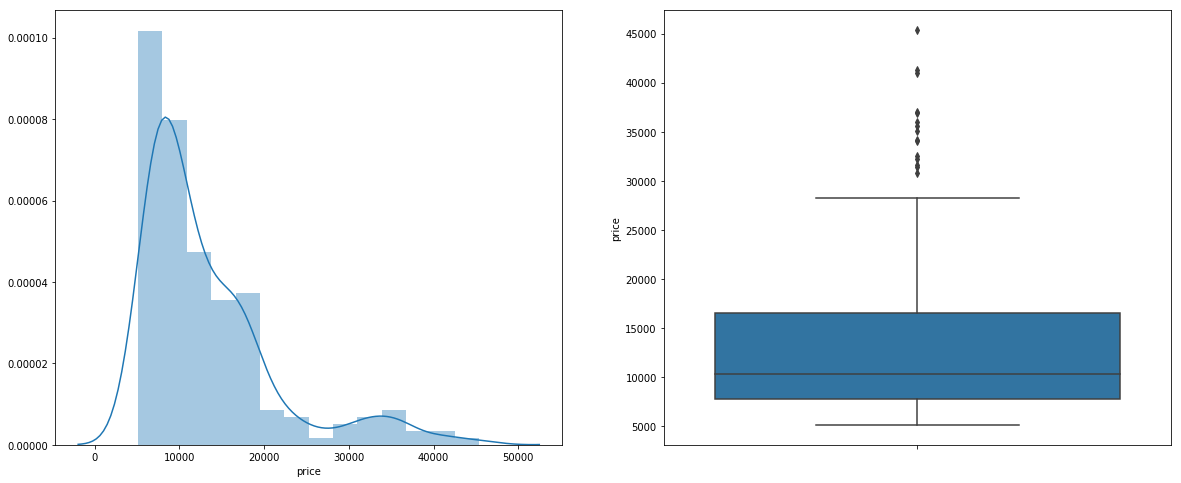

In [92]:
# Analysing the price distribution of cars

plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
sns.distplot(df.price)
plt.subplot(1, 2, 2)
sns.boxplot(y = df.price)
plt.show()

In [93]:
df.price.quantile([.1, .25, .5, .75, .85, .9, 1])

0.10     6657.0
0.25     7788.0
0.50    10295.0
0.75    16503.0
0.85    18500.0
0.90    22563.0
1.00    45400.0
Name: price, dtype: float64

#### infererence
- there is difference between mean and median of the price
    - mean price = 13276.710571
    - median price = 10295.000000
- the distribution of the price is rightly skewed 
- the data points have high variance, 85% of the data has price below 18500 and 15% of the data has price between 22563 to 45400

#### visualizing categorical variables

In [94]:
df.select_dtypes(include = 'object').head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,Company
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


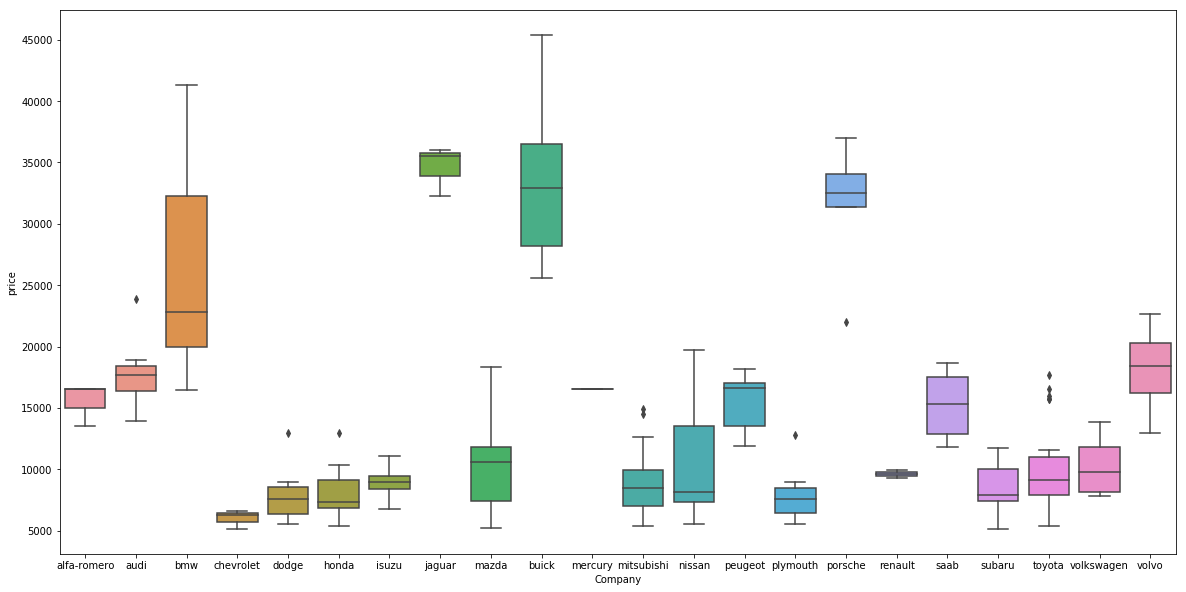

In [95]:
# analysing price spread of the company
plt.figure(figsize = (20, 10))
sns.boxplot(x='Company', y='price', data=df)
plt.show()

C:\Users\36442\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


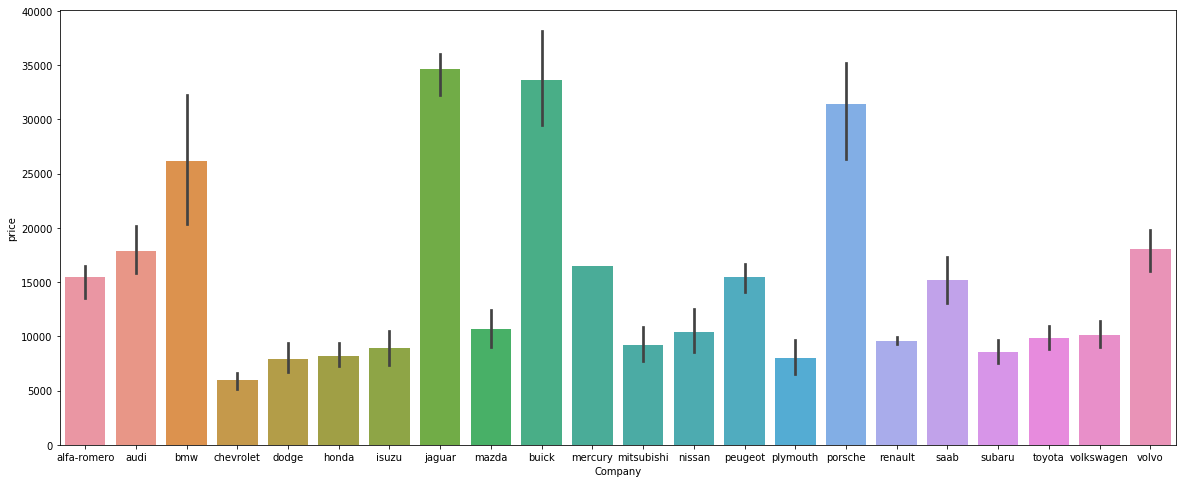

In [96]:
plt.figure(figsize = (20,8))
sns.barplot(x="Company", y="price", data=df)
plt.show()

#### inference
- Jaguar, Buick and porsche seem to be top 3 high price cars

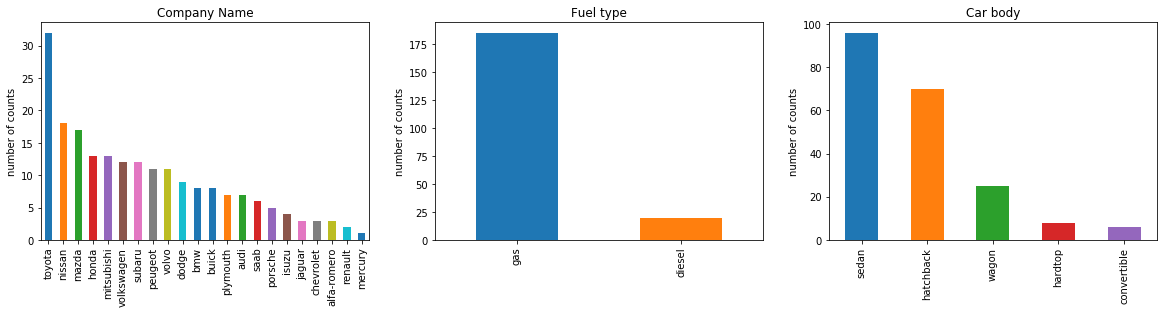

In [97]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
df.Company.value_counts().plot('bar')
plt.ylabel('number of counts')
plt.title('Company Name')
plt.subplot(1,3,2)
df.fueltype.value_counts().plot('bar')
plt.ylabel('number of counts')
plt.title('Fuel type')
plt.subplot(1,3,3)
df.carbody.value_counts().plot('bar')
plt.ylabel('number of counts')
plt.title('Car body')
plt.show()

#### inference
- toyota seem to be favoured company
- number of gas fuel type is greater than diesel fuel type car
- sedan is highly preferred

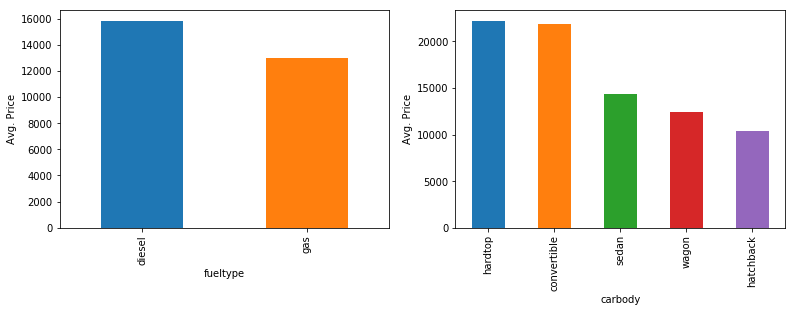

In [98]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
df.groupby('fueltype')['price'].mean().plot('bar')
plt.ylabel('Avg. Price')
plt.subplot(1,2,2)
df.groupby('carbody')['price'].mean().sort_values(ascending = False).plot('bar')
plt.ylabel('Avg. Price')
plt.show()

#### inference
- diesel car is more expensive than gas fuel type car
- hardtop and convertible cars are more expensive than the rest

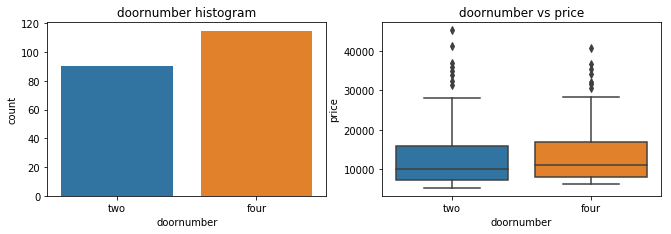

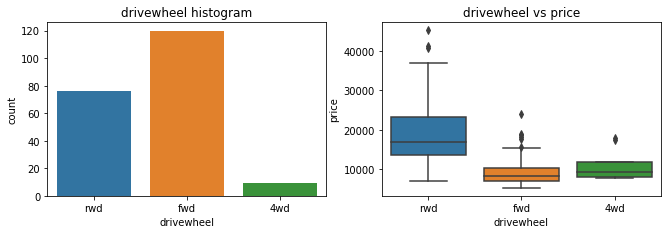

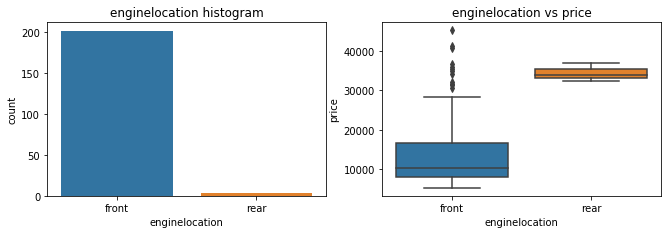

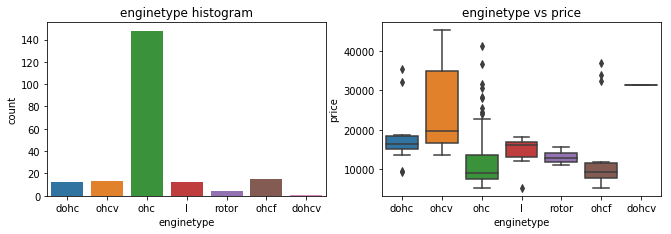

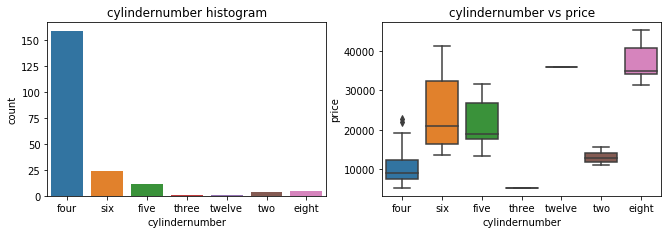

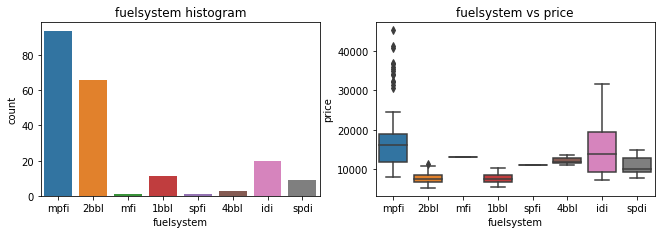

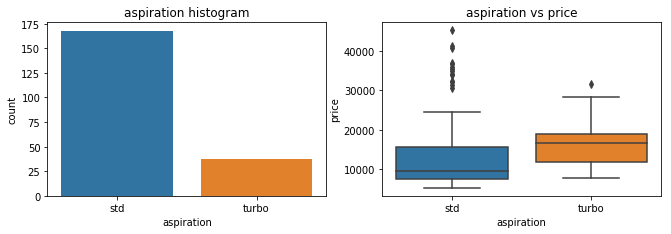

In [99]:
def display(variable, count):
    plt.figure(figsize=(11,30))
    plt.subplot(8,2,count)
    plt.title(variable.name + ' histogram')
    sns.countplot(variable)
    plt.subplot(8,2,count+1)
    plt.title(variable.name + ' vs price')
    sns.boxplot(x = variable, y = 'price', data = df)
    plt.show()
    

display(df.doornumber, 1)
display(df.drivewheel, 3)
display(df.enginelocation, 5)
display(df.enginetype, 7)
display(df.cylindernumber, 9)
display(df.fuelsystem, 11)
display(df.aspiration, 13)

#### inference
- four door cars are highly preferred although they are more expensive than two door cars
- almost all the cars have front engine location and are cheaper than rear located engine cars
- most of the cars have ohc engine type but have lowest price
- dohcv are highly expensive cars
- most of the cars have 4 cylinders 

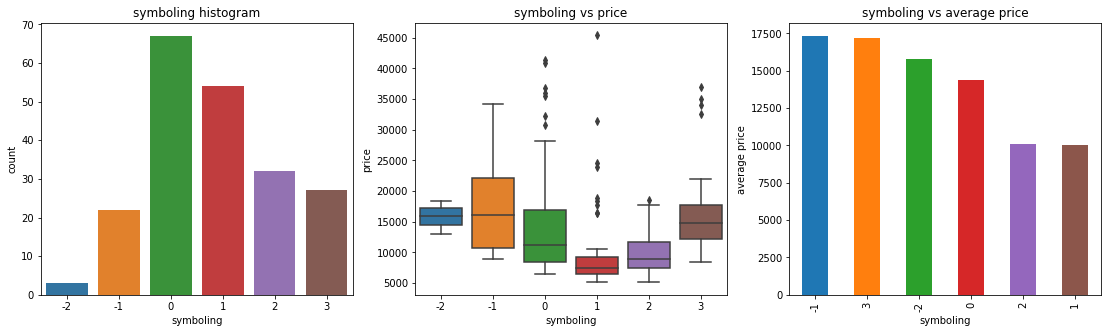

In [100]:
plt.figure(figsize=(19,5))
plt.subplot(1,3,1)
plt.title('symboling histogram')
sns.countplot(df.symboling)
plt.subplot(1,3,2)
plt.title('symboling vs price')
sns.boxplot(x = 'symboling', y = 'price', data = df)
plt.subplot(1,3,3)
plt.ylabel('average price')
plt.title('symboling vs average price')
df.groupby('symboling')['price'].mean().sort_values(ascending = False).plot('bar')
plt.show()

- Its assigned insurance risk rating
- A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 		

<Figure size 3600x3600 with 0 Axes>

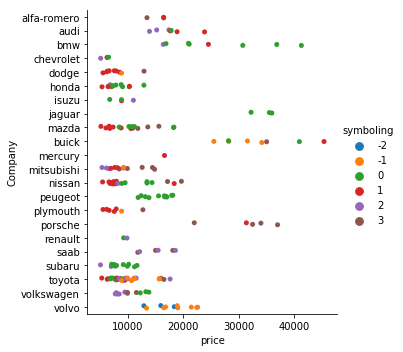

In [101]:
plt.figure(figsize = (50,50))
sns.catplot(x="price", y="Company", hue="symboling", data=df)
plt.show()

#### visualizing numerical data

In [102]:
df.select_dtypes(include = ['int64','float64']).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


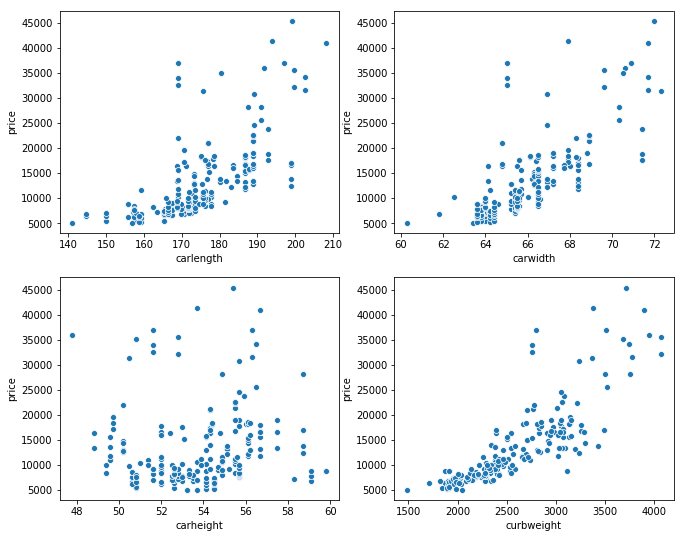

In [103]:
plt.figure(figsize=(11,9))
plt.subplot(2,2,1)
sns.scatterplot(x = 'carlength', y = 'price', data = df)
plt.subplot(2,2,2)
sns.scatterplot(x = 'carwidth', y = 'price', data = df)
plt.subplot(2,2,3)
sns.scatterplot(x = 'carheight', y = 'price', data = df)
plt.subplot(2,2,4)
sns.scatterplot(x = 'curbweight', y = 'price', data = df)
plt.show()

#### inference
- carlength, carwidth and curbweight seem to have correlation with price
- carheigth does not show any significant relation with the price

In [104]:
df_temp = df[['price', 'carlength', 'carwidth', 'carheight', 'curbweight']]
df_temp.corr()

,price,carlength,carwidth,carheight,curbweight
price,1.000000,0.682920,0.759325,0.119336,0.835305
carlength,0.682920,1.000000,0.841118,0.491029,0.877728
carwidth,0.759325,0.841118,1.000000,0.279210,0.867032
carheight,0.119336,0.491029,0.279210,1.000000,0.295572
curbweight,0.835305,0.877728,0.867032,0.295572,1.000000


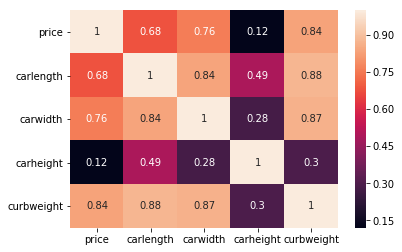

In [105]:
sns.heatmap(df_temp.corr(), annot = True)

#### inference
- price is highly correlated to curbweight

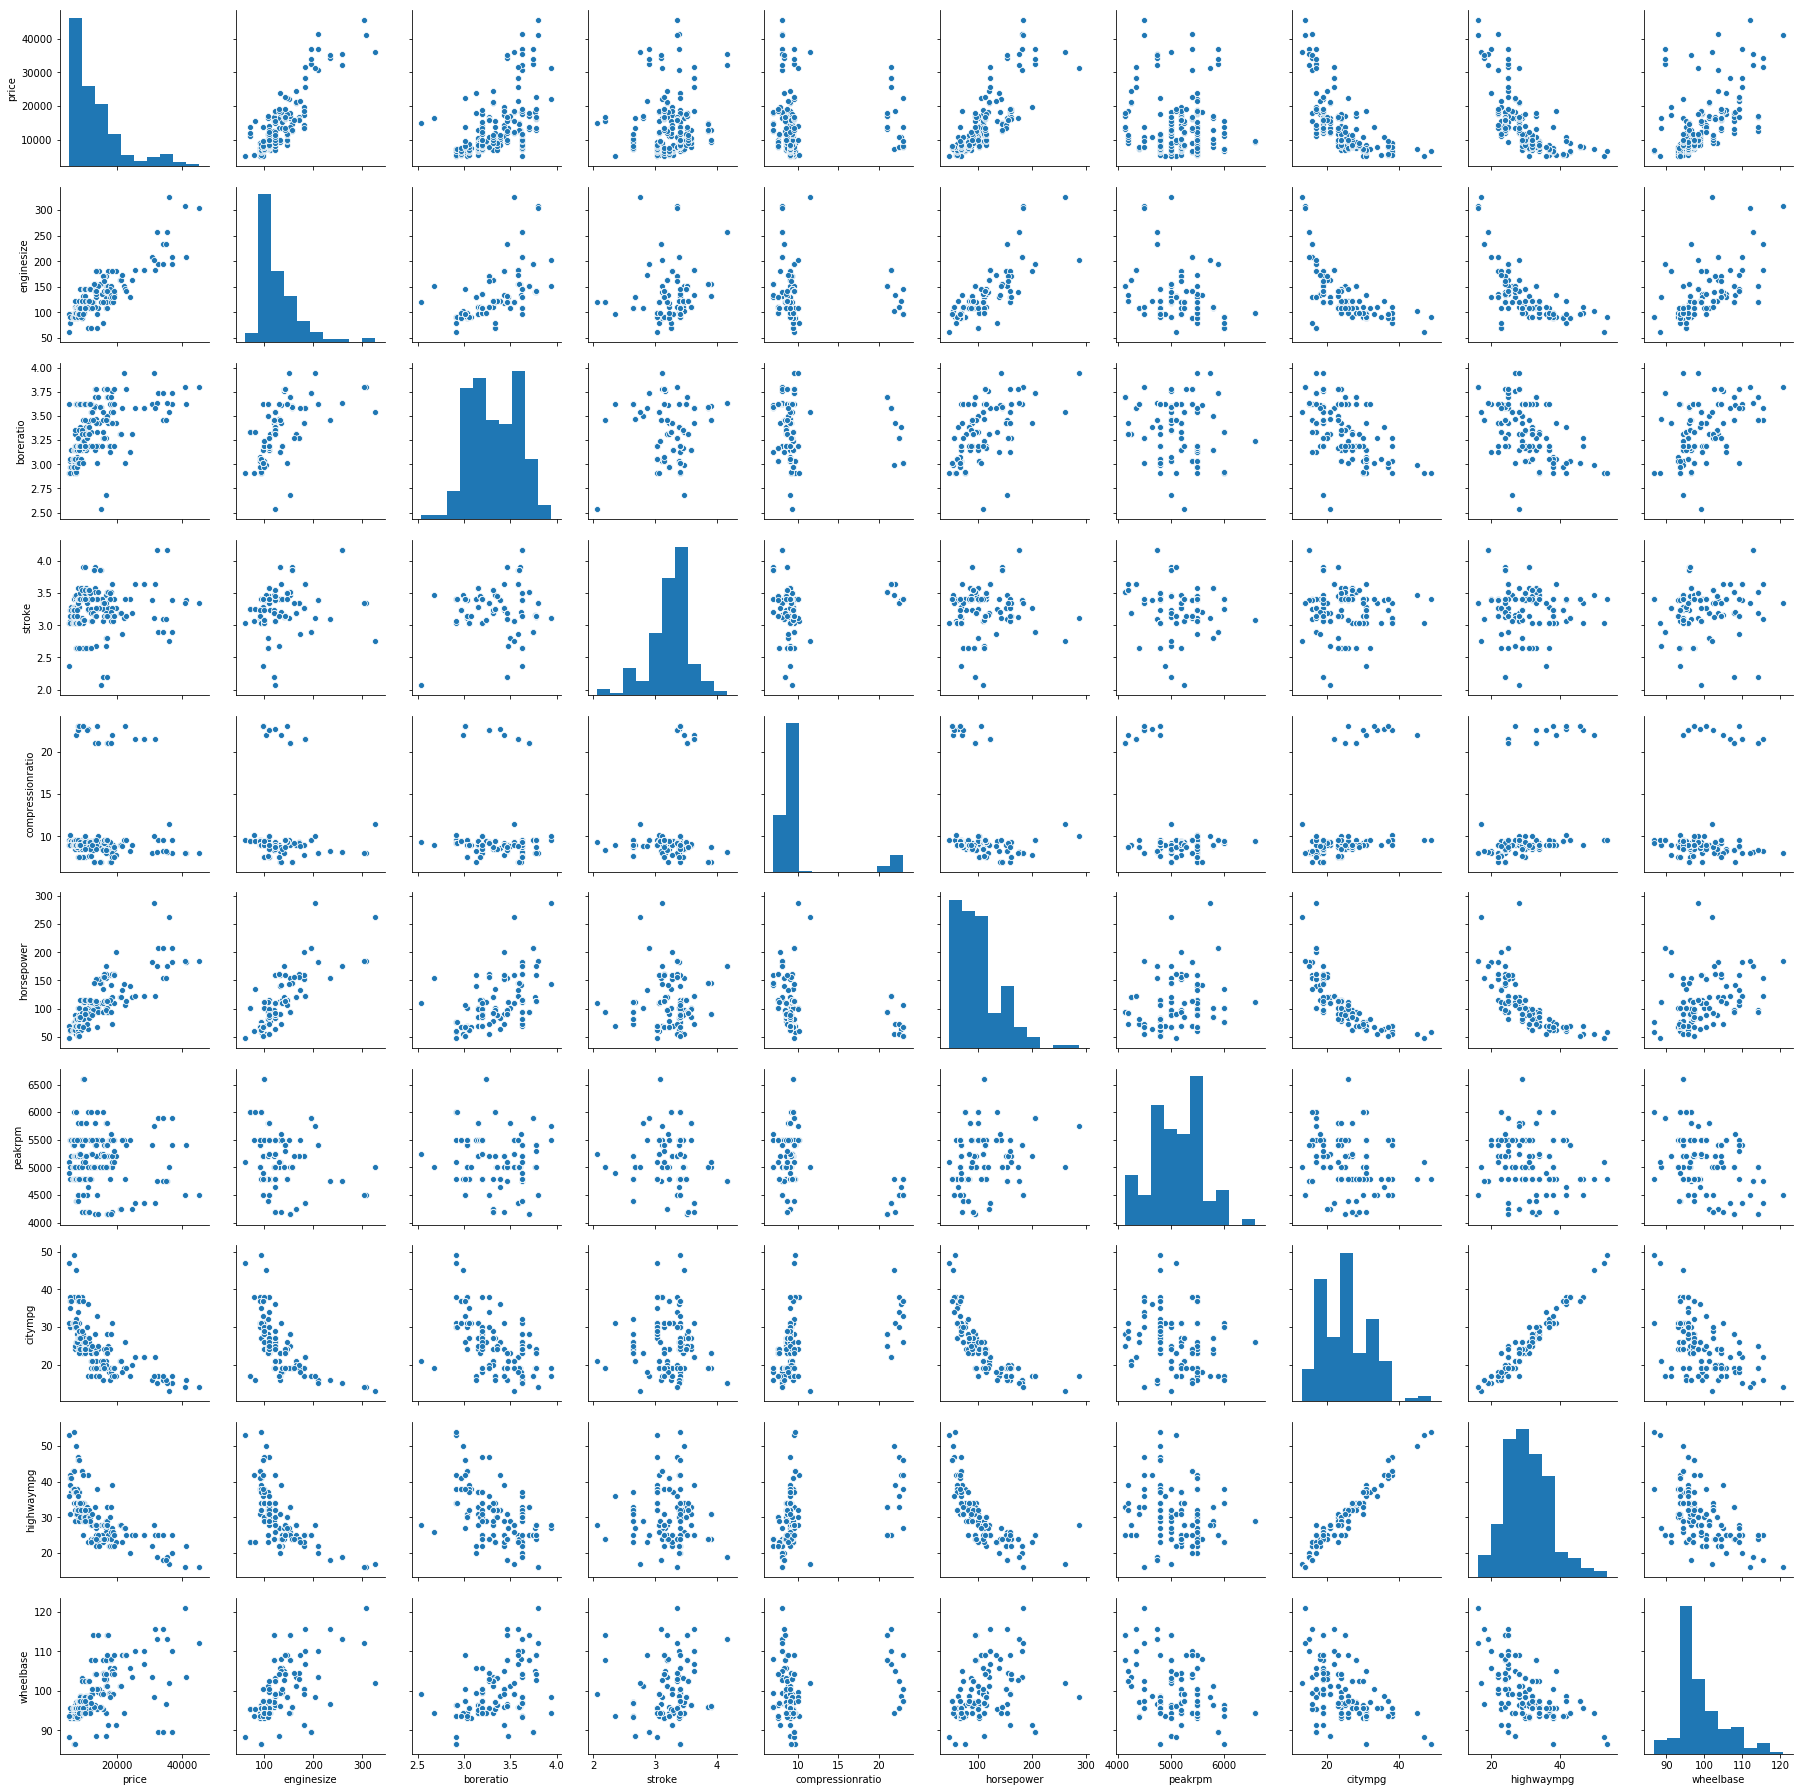

In [106]:
df_temp = df[['price', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'wheelbase']]
sns.pairplot(df_temp)
plt.show()

#### inference
- price seem to be positively correlated with engine size bore ratio, horse power and wheel base
- price seem to be negatively correlated with citympg and highwaympg

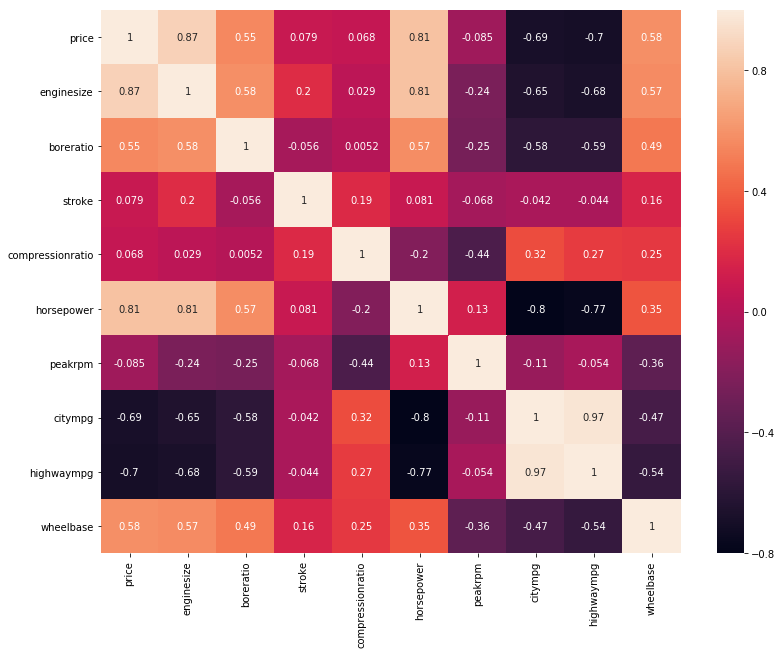

In [107]:
plt.figure(figsize = (13,10))
sns.heatmap(df_temp.corr(), annot = True)

### Step 4: Deriving new features

In [108]:
#Fuel economy
df['fuel_economy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

In [109]:
# Binning the company based on average price of the car
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['Company'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='Company')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Expensive']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,fuel_economy,carsrange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,Medium


### Step 5: Bivariate analysis

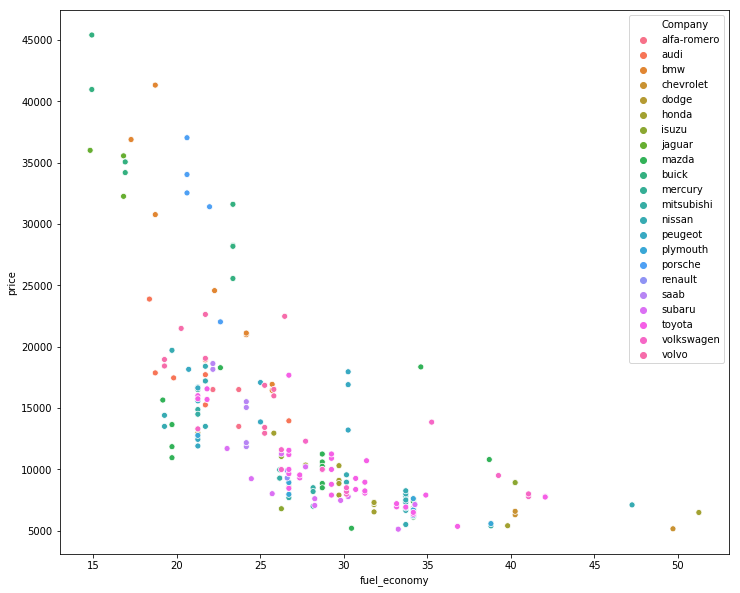

In [110]:
plt.figure(figsize = (12,10))
sns.scatterplot(x= 'fuel_economy', y = 'price', hue = 'Company', data =  df)
plt.show()

#### inference:
- fuel economy is negatively correlated with price

C:\Users\36442\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


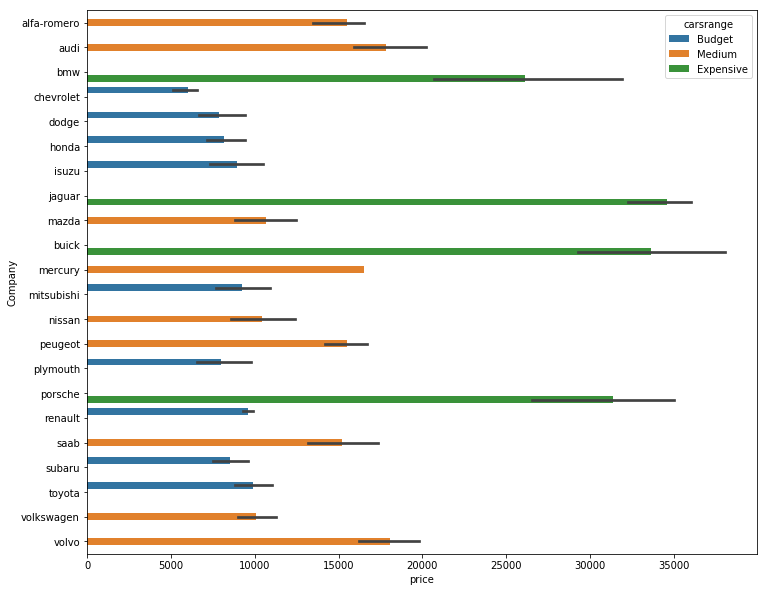

In [111]:
plt.figure(figsize = (12,10))
sns.barplot(x= 'price', y = 'Company', hue = 'carsrange', data =  df)
plt.show()

#### List of significant variables after analysis
- fueltype
- carbody
- drivewheel
- enginelocation
- enginetype
- cylindernumber
- aspiration
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- horsepower
- wheelbase
- fuel_economy
- carsrange

In [112]:
car = df[[ 'price', 'carsrange', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'aspiration', 'carlength',
          'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'fuel_economy']]
car.head()

,price,carsrange,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber,aspiration,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_economy
0,13495,Medium,gas,convertible,rwd,front,dohc,four,std,168.8,64.1,2548,130,3.47,111,88.6,23.70
1,16500,Medium,gas,convertible,rwd,front,dohc,four,std,168.8,64.1,2548,130,3.47,111,88.6,23.70
2,16500,Medium,gas,hatchback,rwd,front,ohcv,six,std,171.2,65.5,2823,152,2.68,154,94.5,22.15
3,13950,Medium,gas,sedan,fwd,front,ohc,four,std,176.6,66.2,2337,109,3.19,102,99.8,26.70
4,17450,Medium,gas,sedan,4wd,front,ohc,five,std,176.6,66.4,2824,136,3.19,115,99.4,19.80


In [113]:
car.shape

(205, 17)

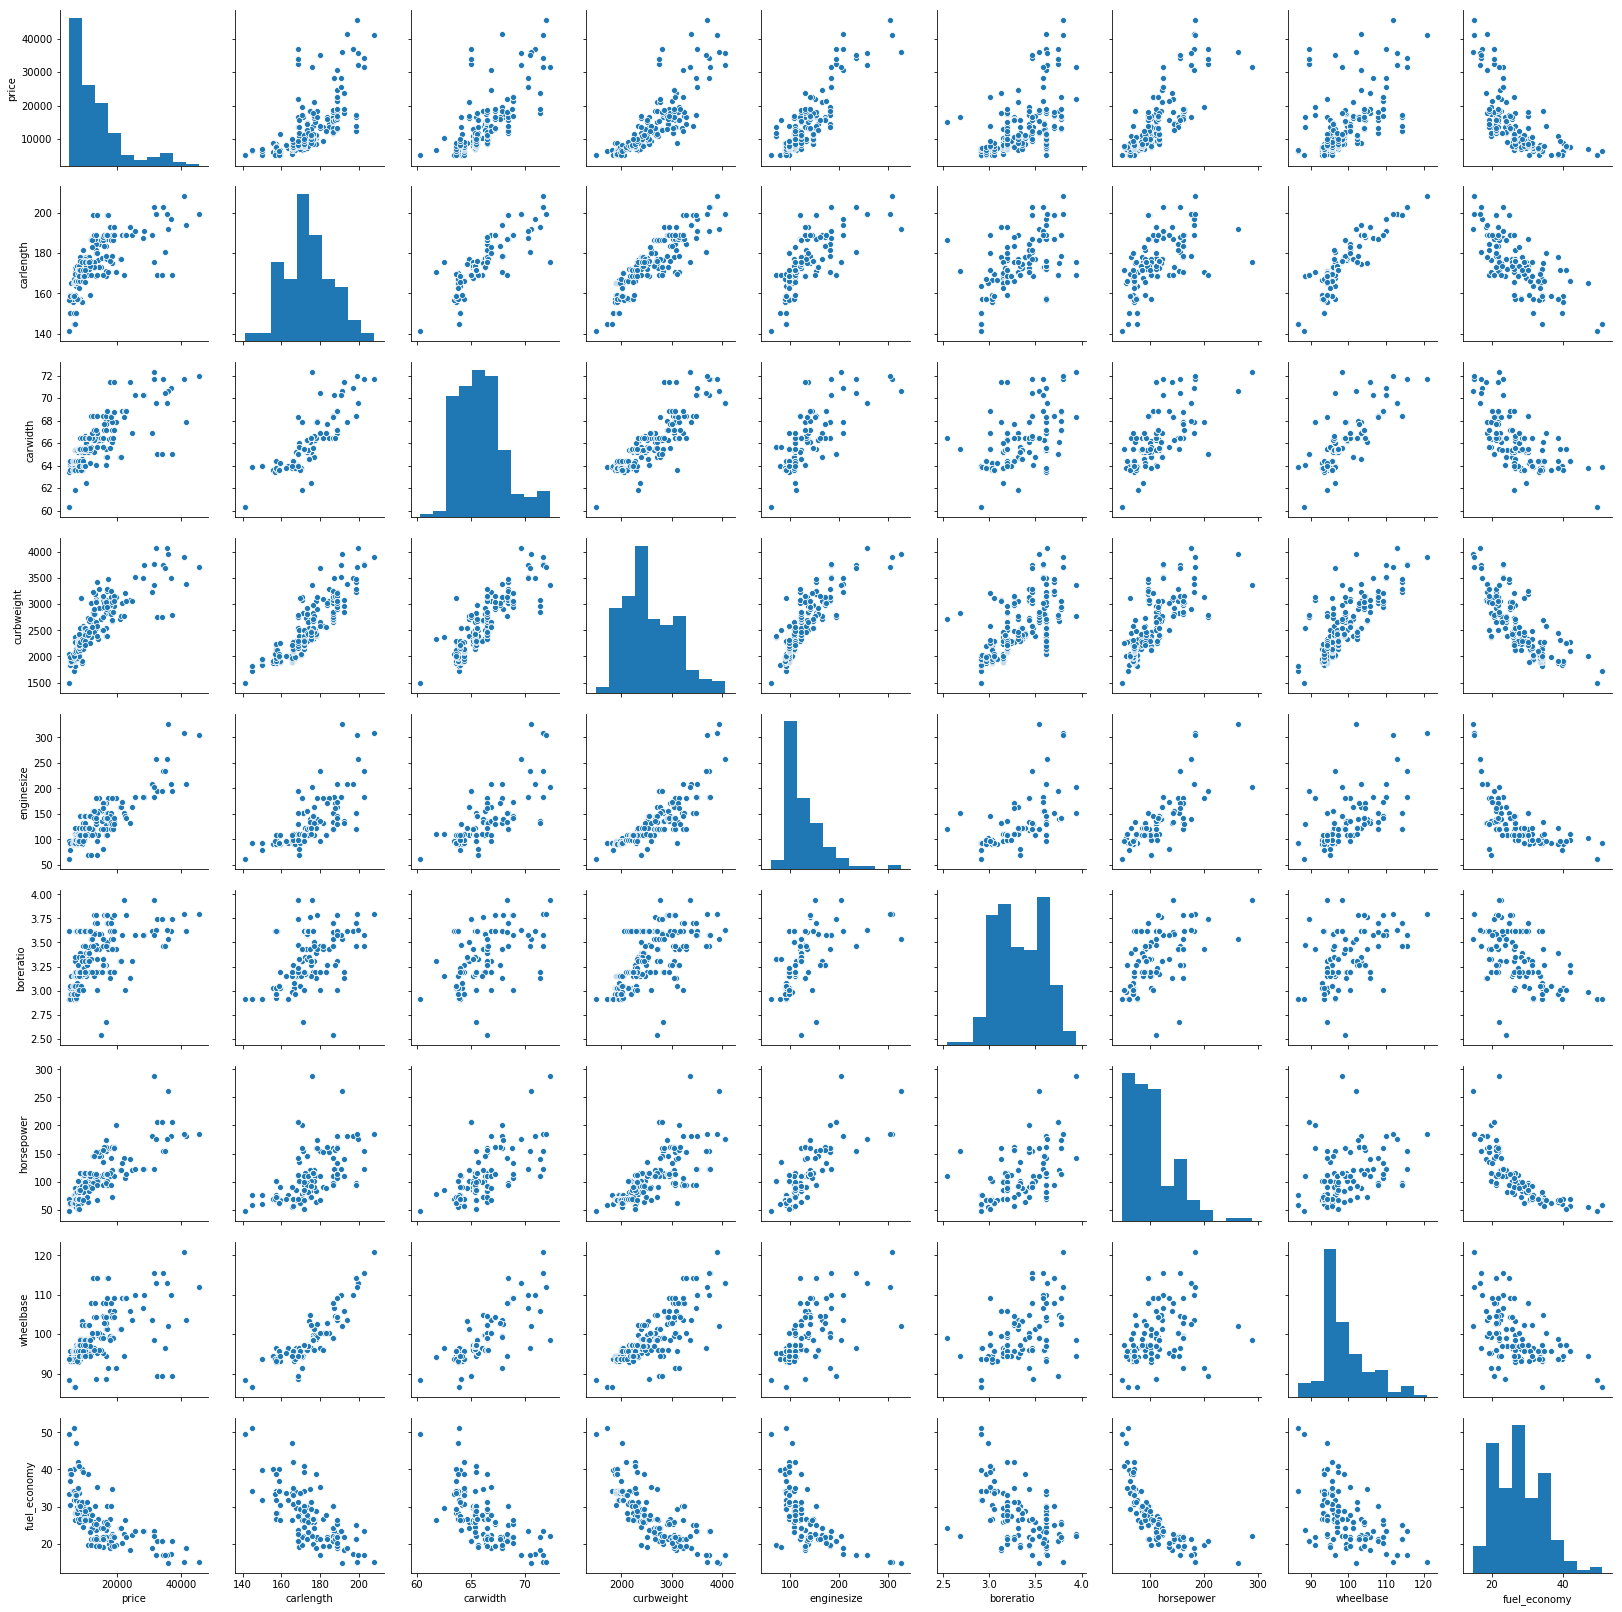

In [114]:
sns.pairplot(car)
plt.show()

### Step 6: Creating dummy variable

In [115]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

car = dummies('carsrange',car)
car = dummies('fueltype',car)
car = dummies('carbody',car)
car = dummies('drivewheel',car)
car = dummies('enginelocation',car)
car = dummies('enginetype',car)
car = dummies('cylindernumber',car)
car = dummies('aspiration',car)

In [116]:
car.head()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_economy,Medium,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,turbo
0,13495,168.8,64.1,2548,130,3.47,111,88.6,23.70,1,...,0,0,0,0,1,0,0,0,0,0
1,16500,168.8,64.1,2548,130,3.47,111,88.6,23.70,1,...,0,0,0,0,1,0,0,0,0,0
2,16500,171.2,65.5,2823,152,2.68,154,94.5,22.15,1,...,0,1,0,0,0,1,0,0,0,0
3,13950,176.6,66.2,2337,109,3.19,102,99.8,26.70,1,...,0,0,0,0,1,0,0,0,0,0
4,17450,176.6,66.4,2824,136,3.19,115,99.4,19.80,1,...,0,0,0,1,0,0,0,0,0,0


In [117]:
car.shape

(205, 32)

### Step 7: Splitting the train-test data and Rescaling the features

In [118]:
import sklearn
from sklearn.model_selection import train_test_split

car_train, car_test = train_test_split(car, train_size = 0.8, random_state = 100)
print(car_train.shape)
print(car_test.shape)

(164, 32)
(41, 32)


C:\Users\36442\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [119]:
from sklearn.preprocessing import MinMaxScaler

# 1. instantiate an object
scaler = MinMaxScaler()

# create list of numeric vars
num_vars = ['carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'fuel_economy']

# 2. fit on data
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])
car_train.head()

C:\Users\36442\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\36442\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_economy,Medium,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,turbo
3,13950,0.577236,0.491667,0.329325,0.181132,0.404762,0.225000,0.455172,0.326475,1,...,0,0,0,0,1,0,0,0,0,0
157,7198,0.409756,0.341667,0.240884,0.139623,0.404762,0.091667,0.313793,0.503429,0,...,0,0,0,0,1,0,0,0,0,0
81,8499,0.518699,0.425000,0.325834,0.230189,0.531746,0.166667,0.334483,0.366255,0,...,0,0,0,0,1,0,0,0,0,0
32,5399,0.144715,0.308333,0.135376,0.067925,0.182540,0.050000,0.244828,0.685871,0,...,0,0,0,0,1,0,0,0,0,0
99,8949,0.525203,0.408333,0.324282,0.222642,0.515873,0.204167,0.365517,0.421125,1,...,0,0,0,0,1,0,0,0,0,0


In [120]:
car_train.describe()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_economy,Medium,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,turbo
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000
mean,12761.085366,0.519899,0.454726,0.398579,0.236493,0.489983,0.221037,0.404605,0.367786,0.408537,...,0.079268,0.054878,0.02439,0.060976,0.762195,0.121951,0.006098,0.006098,0.02439,0.170732
std,7691.534852,0.197651,0.179980,0.202330,0.148945,0.203913,0.164011,0.197731,0.185431,0.493069,...,0.270984,0.228440,0.15473,0.240018,0.427043,0.328232,0.078087,0.078087,0.15473,0.377427
min,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,7669.000000,0.409756,0.308333,0.247673,0.135849,0.293651,0.090625,0.272414,0.203704,0.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,9927.000000,0.502439,0.425000,0.347944,0.184906,0.468254,0.183333,0.341379,0.353909,0.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,15808.750000,0.615041,0.516667,0.522789,0.287736,0.682540,0.283333,0.475862,0.518519,1.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,41315.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


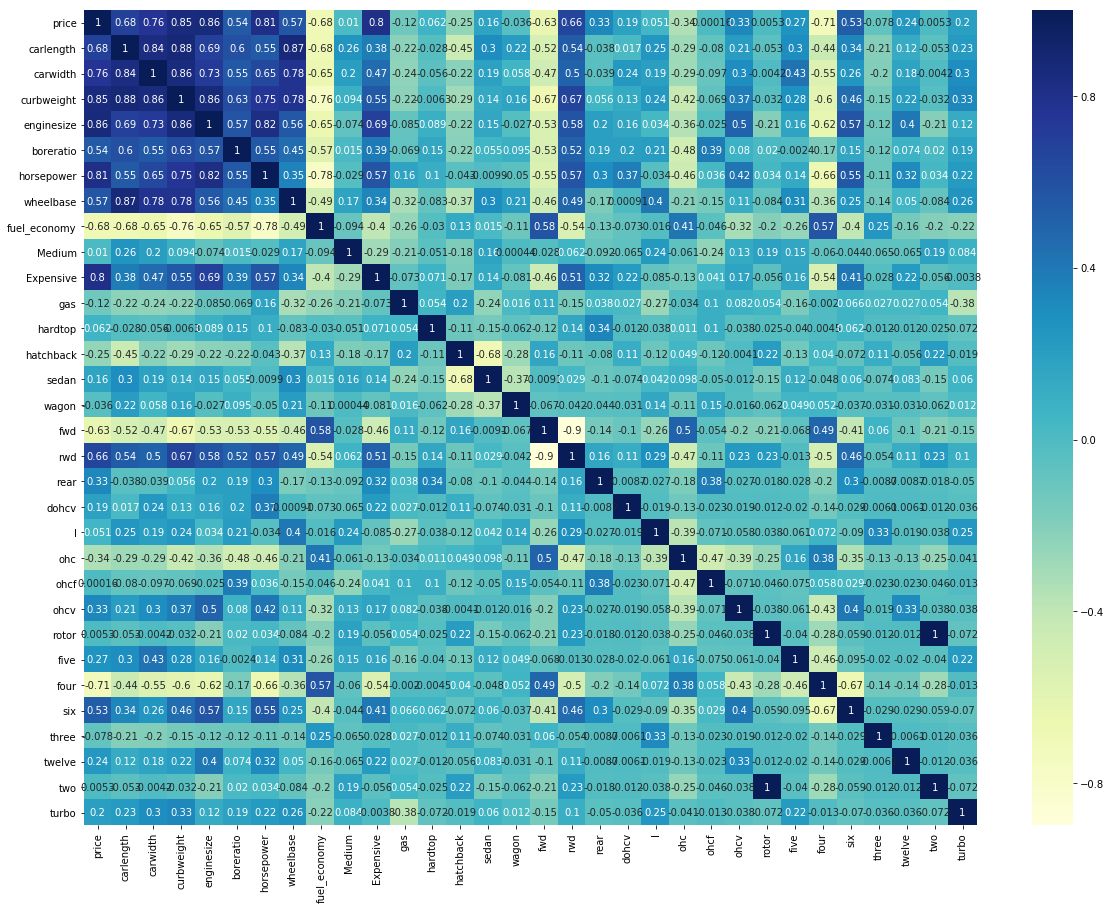

In [121]:
# heat map
plt.figure(figsize = (20, 15))
sns.heatmap(car_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

#### inference:
- enginesize, curbweight and horsepower are top 3 positively correlated features with price

In [122]:
car_train.head()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_economy,Medium,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,turbo
3,13950,0.577236,0.491667,0.329325,0.181132,0.404762,0.225000,0.455172,0.326475,1,...,0,0,0,0,1,0,0,0,0,0
157,7198,0.409756,0.341667,0.240884,0.139623,0.404762,0.091667,0.313793,0.503429,0,...,0,0,0,0,1,0,0,0,0,0
81,8499,0.518699,0.425000,0.325834,0.230189,0.531746,0.166667,0.334483,0.366255,0,...,0,0,0,0,1,0,0,0,0,0
32,5399,0.144715,0.308333,0.135376,0.067925,0.182540,0.050000,0.244828,0.685871,0,...,0,0,0,0,1,0,0,0,0,0
99,8949,0.525203,0.408333,0.324282,0.222642,0.515873,0.204167,0.365517,0.421125,1,...,0,0,0,0,1,0,0,0,0,0


In [123]:
car_train.columns

Index(['price', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'wheelbase', 'fuel_economy', 'Medium',
       'Expensive', 'gas', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd',
       'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five',
       'four', 'six', 'three', 'twelve', 'two', 'turbo'],
      dtype='object')

In [124]:
# dividing car_train into X and y variable
y_train = car_train.pop('price')
X_train = car_train

In [125]:
y_train.head()

3      13950
157     7198
81      8499
32      5399
99      8949
Name: price, dtype: int32

In [126]:
X_train.head()

,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_economy,Medium,Expensive,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,turbo
3,0.577236,0.491667,0.329325,0.181132,0.404762,0.225000,0.455172,0.326475,1,0,...,0,0,0,0,1,0,0,0,0,0
157,0.409756,0.341667,0.240884,0.139623,0.404762,0.091667,0.313793,0.503429,0,0,...,0,0,0,0,1,0,0,0,0,0
81,0.518699,0.425000,0.325834,0.230189,0.531746,0.166667,0.334483,0.366255,0,0,...,0,0,0,0,1,0,0,0,0,0
32,0.144715,0.308333,0.135376,0.067925,0.182540,0.050000,0.244828,0.685871,0,0,...,0,0,0,0,1,0,0,0,0,0
99,0.525203,0.408333,0.324282,0.222642,0.515873,0.204167,0.365517,0.421125,1,0,...,0,0,0,0,1,0,0,0,0,0


### Step 8: Building the model

In [127]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
# RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [129]:
 # areas which are selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carlength', False, 12),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 21),
 ('boreratio', False, 11),
 ('horsepower', True, 1),
 ('wheelbase', False, 2),
 ('fuel_economy', False, 3),
 ('Medium', False, 13),
 ('Expensive', True, 1),
 ('gas', False, 20),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 19),
 ('rwd', False, 15),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 17),
 ('ohc', False, 8),
 ('ohcf', False, 9),
 ('ohcv', False, 10),
 ('rotor', False, 14),
 ('five', False, 7),
 ('four', False, 4),
 ('six', False, 6),
 ('three', False, 16),
 ('twelve', False, 5),
 ('two', False, 18),
 ('turbo', False, 22)]

In [130]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'horsepower', 'Expensive', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'rear', 'dohcv'],
      dtype='object')

In [131]:
# unuseful vars
X_train.columns[~rfe.support_]    

Index(['carlength', 'enginesize', 'boreratio', 'wheelbase', 'fuel_economy',
       'Medium', 'gas', 'fwd', 'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'five', 'four', 'six', 'three', 'twelve', 'two', 'turbo'],
      dtype='object')

#### Building model using statsmodel, for detailed statistics

In [132]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model 1

In [133]:
X_train_rfe = X_train[col]

In [134]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     216.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.55e-85
Time:                        16:10:03   Log-Likelihood:                -1476.7
No. Observations:                 164   AIC:                             2975.
Df Residuals:                     153   BIC:                             3009.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4350.1729   1065.491      4.083      0.0

- since p-value of "hardtop" > 0.05, therefore dropping it

In [135]:
X_train_new = X_train_rfe.drop(["hardtop"], axis = 1)

#### Model 2

In [136]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.72e-84
Time:                        16:10:04   Log-Likelihood:                -1481.3
No. Observations:                 164   AIC:                             2983.
Df Residuals:                     154   BIC:                             3014.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2557.2278    903.465      2.830      0.0

In [137]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,30.64
2,curbweight,7.72
6,sedan,6.57
5,hatchback,6.16
1,carwidth,4.47
3,horsepower,4.08
7,wagon,3.76
4,Expensive,1.79
8,rear,1.64
9,dohcv,1.44


- VIF > 5 should not be ignored
- therefore dropping feature "curbweight" as it is showing high multicollinearity

In [138]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### Model 3

In [139]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     223.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.46e-81
Time:                        16:10:04   Log-Likelihood:                -1492.2
No. Observations:                 164   AIC:                             3002.
Df Residuals:                     155   BIC:                             3030.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2880.4237    959.253      3.003      0.0

- since p-value of "rear" > 0.05, hence dropping it

In [140]:
X_train_new = X_train_new.drop(["rear"], axis = 1)

#### Model 4

In [141]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.75e-80
Time:                        16:10:04   Log-Likelihood:                -1496.6
No. Observations:                 164   AIC:                             3009.
Df Residuals:                     156   BIC:                             3034.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4026.4943    896.622      4.491      0.0

In [142]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,25.38
5,sedan,5.73
4,hatchback,5.22
6,wagon,3.38
2,horsepower,2.45
1,carwidth,2.05
3,Expensive,1.59
7,dohcv,1.19


- VIF > 5 should not be ignored
- therefore dropping feature "sedan" as it is showing high multicollinearity

In [143]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

#### Model 5

In [144]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     269.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.48e-80
Time:                        16:10:05   Log-Likelihood:                -1500.8
No. Observations:                 164   AIC:                             3016.
Df Residuals:                     157   BIC:                             3037.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2063.0393    590.433      3.494      0.0

- since p-value of "wagon" > 0.05, hence dropping it

In [145]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

#### Model 6

In [146]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     323.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.98e-81
Time:                        16:10:05   Log-Likelihood:                -1501.3
No. Observations:                 164   AIC:                             3015.
Df Residuals:                     158   BIC:                             3033.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1962.6110    582.760      3.368      0.0

In [147]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,10.25
2,horsepower,2.27
1,carwidth,1.88
3,Expensive,1.55
5,dohcv,1.19
4,hatchback,1.11


#### Model 7

#### dropping "hatchback" just to check the statistics of the model

In [148]:
X_train_new = X_train_new.drop(["hatchback"], axis = 1)

In [149]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     379.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.22e-80
Time:                        16:10:05   Log-Likelihood:                -1506.4
No. Observations:                 164   AIC:                             3023.
Df Residuals:                     159   BIC:                             3038.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1193.7288    545.317      2.189      0.0

In [150]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,8.49
2,horsepower,2.22
1,carwidth,1.78
3,Expensive,1.52
4,dohcv,1.16


### Step 9: Residual analysis on train set

In [151]:
lm = sm.OLS(y_train, X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

C:\Users\36442\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Errors')

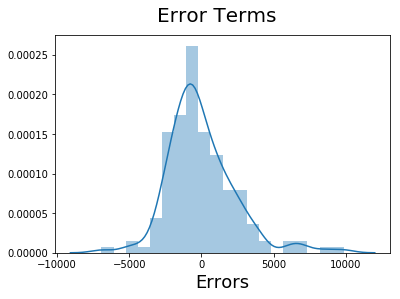

In [152]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

- errors seem to be normally distributed with mean = 0

### Step 10: Prediction and evaluation

In [153]:
# scaling the test set
# create list of numeric vars
num_vars = ['carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'fuel_economy']

# 2. fit on data
car_test[num_vars] = scaler.transform(car_test[num_vars])
car_test.head()

C:\Users\36442\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\36442\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_economy,Medium,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,turbo
160,7738,0.409756,0.341667,0.235066,0.139623,0.404762,0.091667,0.313793,0.747599,0,...,0,0,0,0,1,0,0,0,0,0
186,8495,0.497561,0.433333,0.305275,0.181132,0.404762,0.154167,0.368966,0.421125,1,...,0,0,0,0,1,0,0,0,0,0
59,8845,0.596748,0.516667,0.347944,0.230189,0.563492,0.150000,0.420690,0.381344,1,...,0,0,0,0,1,0,0,0,0,0
165,9298,0.448780,0.308333,0.301396,0.139623,0.444444,0.266667,0.272414,0.344307,0,...,0,0,0,0,1,0,0,0,0,0
140,7603,0.263415,0.291667,0.291699,0.177358,0.746032,0.104167,0.231034,0.368999,0,...,1,0,0,0,1,0,0,0,0,0


In [154]:
car_test.describe()

,price,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,wheelbase,fuel_economy,Medium,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,turbo
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.0,41.0,41.0,41.000000
mean,15339.170732,0.599207,0.517683,0.476215,0.297561,0.618467,0.284959,0.477544,0.299609,0.463415,...,0.048780,0.097561,0.0,0.024390,0.829268,0.097561,0.0,0.0,0.0,0.219512
std,8886.211189,0.202206,0.166533,0.190466,0.180215,0.229504,0.159654,0.237096,0.160572,0.504854,...,0.218085,0.300406,0.0,0.156174,0.380949,0.300406,0.0,0.0,0.0,0.419058
min,5572.000000,0.056911,0.291667,0.128394,0.109434,-0.111111,0.083333,0.000000,0.002743,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,8948.000000,0.497561,0.408333,0.347944,0.184906,0.468254,0.154167,0.320690,0.176955,0.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000
50%,13499.000000,0.570732,0.516667,0.483320,0.230189,0.682540,0.266667,0.431034,0.286694,0.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000
75%,17199.000000,0.741463,0.575000,0.603957,0.320755,0.746032,0.404167,0.610345,0.381344,1.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000
max,45400.000000,1.089431,0.975000,0.935609,0.932075,0.888889,0.662500,1.182759,0.747599,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000


In [155]:
# dividing y_test and X_test
y_test = car_test.pop('price')
X_test = car_test

In [156]:
cols = X_train_new.drop(['const'], axis = 1)
X_test_sm = X_test[cols.columns]
X_test_new = sm.add_constant(X_test_sm)       # adding constant
X_test_new.head()

,const,carwidth,horsepower,Expensive,dohcv
160,1.0,0.341667,0.091667,0,0
186,1.0,0.433333,0.154167,0,0
59,1.0,0.516667,0.150000,0,0
165,1.0,0.308333,0.266667,0,0
140,1.0,0.291667,0.104167,0,0


In [157]:
# making prediction
y_test_pred = lm.predict(X_test_new)

In [158]:
# evaluation
from sklearn.metrics import r2_score 
r2_score(y_test, y_test_pred)

0.9094330812753356

Text(0,0.5,'y_test_pred')

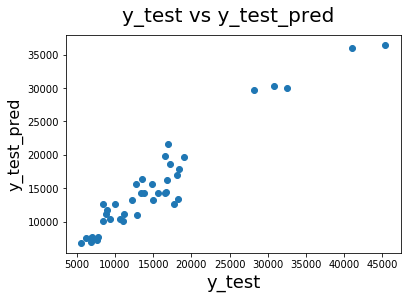

In [159]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)   

In [160]:
# statistical summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     379.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.22e-80
Time:                        16:10:07   Log-Likelihood:                -1506.4
No. Observations:                 164   AIC:                             3023.
Df Residuals:                     159   BIC:                             3038.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1193.7288    545.317      2.189      0.0

#### inference:
- since R-squared and adjusted R-squared are 0.912 and 0.909, hence 90% variance explained by the model
- all the p-values are less than 0.05, therefore we can say the coefficients are statistically significant